# Übergangswahrscheinlichkeiten
###  Bestimme relative Übergangswahrscheinlichkeiten vom Zustand Zuhause an Werktagen in Abhängigkeit des Zeitschrittes

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\thoma\\Desktop\\ev-modelling-repo\\Data\\NHTS_trips_processed.csv")

In [4]:
df.head()

,ID,ST_WOTAG,WHYFROM,zweck,W_NR,TRPTRANS,wegkm,wegmin_imp1,W_SZ,W_AZ,W_SZ_MIN,W_AZ_MIN,W_SZ_t
0,300000071,1,1,4,1,3,8.439,15,1000,1015,600,615,40
1,300000071,1,4,1,2,3,8.286,20,1510,1530,910,930,61
2,300000072,1,2,1,1,6,135.191,120,700,900,420,540,28
3,300000072,1,1,2,2,6,131.367,150,1800,2030,1080,1230,72
4,300000073,1,1,2,1,3,3.621,15,845,900,525,540,35


## Beschränkung auf Werktage

In [5]:
filt = df["ST_WOTAG"] < 6
df = df[filt]

In [6]:
df["ST_WOTAG"].value_counts()

5    154049
4    150812
3    147798
2    147502
1    137379
Name: ST_WOTAG, dtype: int64

## Filtern nach Ausgangszuständen

In [7]:
zuhause = df[df["WHYFROM"]==1]

arbeit = df[df["WHYFROM"]==2]

einkaufen = df[df["WHYFROM"]==3]

freizeit = df[df["WHYFROM"]==4]

sonstiges = df[df["WHYFROM"]==5]


In [8]:
# Vernachlässige Rundreisen
zuhause = zuhause[zuhause["zweck"] != 1]
arbeit = arbeit[arbeit["zweck"] != 2]
einkaufen = einkaufen[einkaufen["zweck"] != 3]
freizeit = freizeit[freizeit["zweck"] != 4]
sonstiges = sonstiges[sonstiges["zweck"] != 5]

## Gruppieren der Trips nach Zeitschrit t des Wegbeginns

In [9]:
zuhause_grpd = zuhause.groupby(["W_SZ_t"])
arbeit_grpd = arbeit.groupby(["W_SZ_t"])
einkaufen_grpd = einkaufen.groupby(["W_SZ_t"])
freizeit_grpd = freizeit.groupby(["W_SZ_t"])
sonstiges_grpd = sonstiges.groupby(["W_SZ_t"])

## Zuordnen der relativen Übergangswahrscheinlichkeiten zu den anderen Zuständen in jedem Zeitschritt

In [10]:
zuhause_arbeit = [0 for i in range(97)]
zuhause_einkaufen = [0 for i in range(97)]
zuhause_freizeit = [0 for i in range(97)]
zuhause_sonstiges = [0 for i in range(97)]

arbeit_zuhause = [0 for i in range(97)]
arbeit_einkaufen = [0 for i in range(97)]
arbeit_freizeit = [0 for i in range(97)]
arbeit_sonstiges = [0 for i in range(97)]

einkaufen_arbeit = [0 for i in range(97)]
einkaufen_zuhause = [0 for i in range(97)]
einkaufen_freizeit = [0 for i in range(97)]
einkaufen_sonstiges = [0 for i in range(97)]

freizeit_arbeit = [0 for i in range(97)]
freizeit_einkaufen = [0 for i in range(97)]
freizeit_zuhause = [0 for i in range(97)]
freizeit_sonstiges = [0 for i in range(97)]

sonstiges_arbeit = [0 for i in range(97)]
sonstiges_einkaufen = [0 for i in range(97)]
sonstiges_freizeit = [0 for i in range(97)]
sonstiges_zuhause = [0 for i in range(97)]

In [11]:
# zähle relative Häufigkeit der Trips zum gegebenen Zustand in Zeitschritt t
for t, group in zuhause_grpd:
    counts = group["zweck"].value_counts(normalize=True)
    if counts.get(2):
        zuhause_arbeit[t] = counts.get(2)
    if counts.get(3):
        zuhause_einkaufen[t] = counts.get(3)
    if counts.get(4):
        zuhause_freizeit[t] = counts.get(4)
    if counts.get(5):
        zuhause_sonstiges[t] = counts.get(5)

In [12]:
for t, group in arbeit_grpd:
    counts = group["zweck"].value_counts(normalize=True)
    if counts.get(1):
        arbeit_zuhause[t] = counts.get(1)
    if counts.get(3):
        arbeit_einkaufen[t] = counts.get(3)
    if counts.get(4):
        arbeit_freizeit[t] = counts.get(4)
    if counts.get(5):
        arbeit_sonstiges[t] = counts.get(5)

In [13]:
for t, group in einkaufen_grpd:
    counts = group["zweck"].value_counts(normalize=True)
    if counts.get(1):
        einkaufen_zuhause[t] = counts.get(1)
    if counts.get(2):
        einkaufen_arbeit[t] = counts.get(2)
    if counts.get(4):
        einkaufen_freizeit[t] = counts.get(4)
    if counts.get(5):
        einkaufen_sonstiges[t] = counts.get(5)

In [14]:
for t, group in freizeit_grpd:
    counts = group["zweck"].value_counts(normalize=True)
    if counts.get(1):
        freizeit_zuhause[t] = counts.get(1)
    if counts.get(2):
        freizeit_arbeit[t] = counts.get(2)
    if counts.get(3):
        freizeit_einkaufen[t] = counts.get(3)
    if counts.get(5):
        freizeit_sonstiges[t] = counts.get(5)

In [15]:
for t, group in sonstiges_grpd:
    counts = group["zweck"].value_counts(normalize=True)
    if counts.get(1):
        sonstiges_zuhause[t] = counts.get(1)
    if counts.get(2):
        sonstiges_arbeit[t] = counts.get(2)
    if counts.get(3):
        sonstiges_einkaufen[t] = counts.get(3)
    if counts.get(4):
        sonstiges_freizeit[t] = counts.get(4)

## Visualisierung

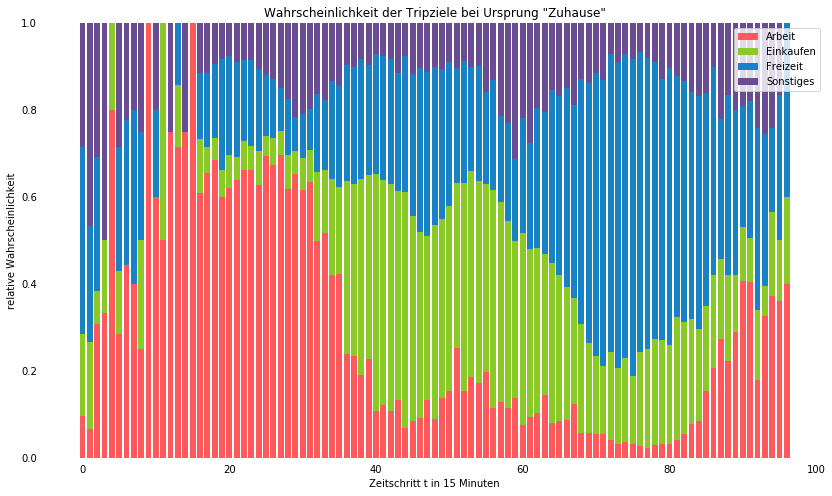

In [16]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
plt.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
plt.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
plt.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.box(on=None)
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True)
plt.legend();


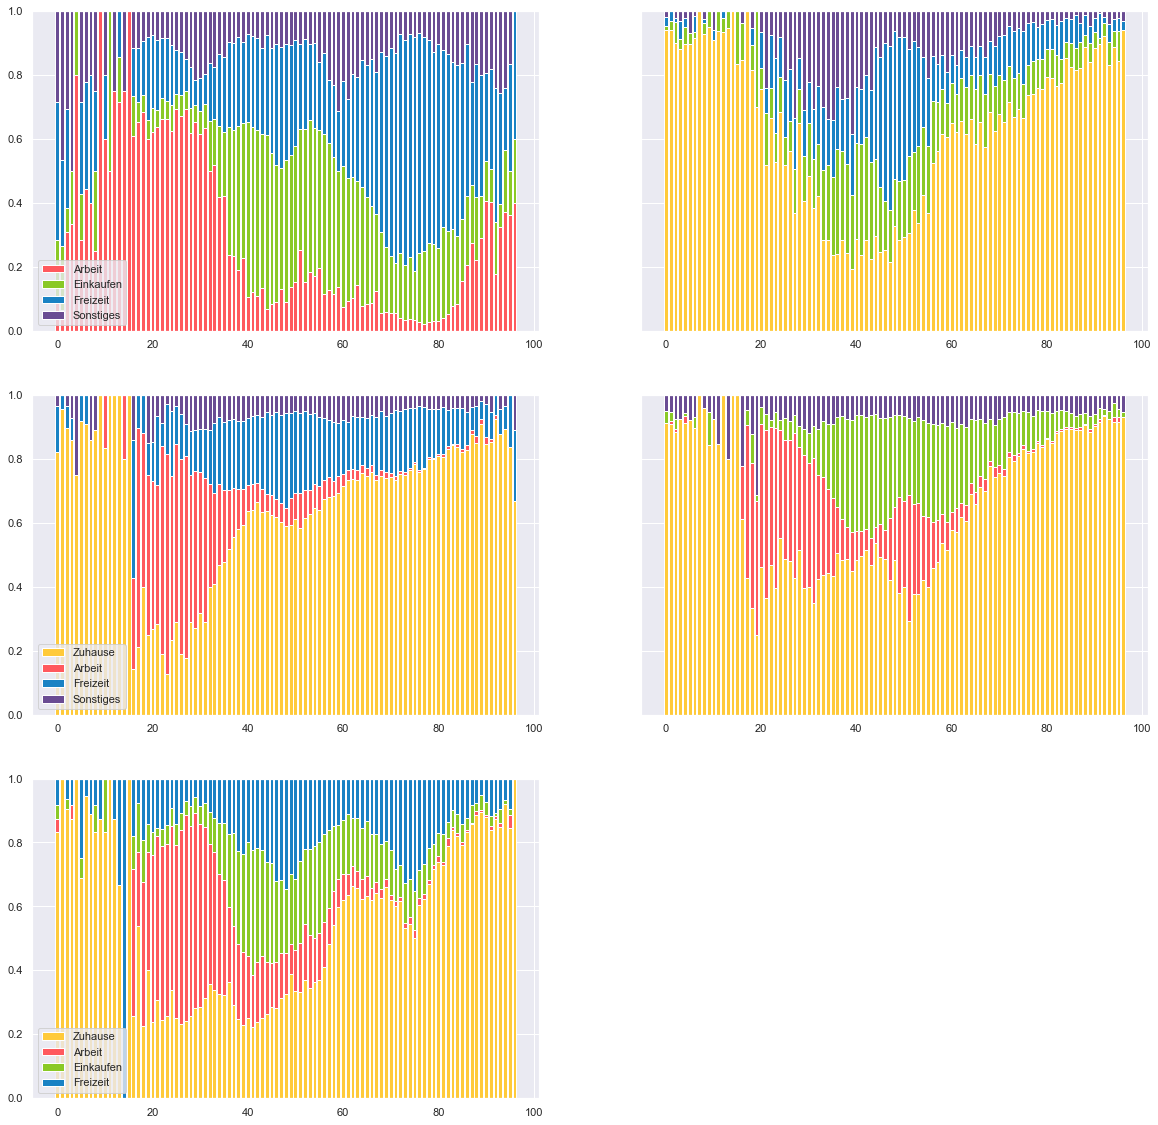

In [17]:
sns.set()
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
ax1.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
ax1.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
ax1.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
ax1.legend()

ax2.bar(x, arbeit_zuhause, label="Zuhause", color='#FFCA3A');
ax2.bar(x, arbeit_einkaufen, bottom=arbeit_zuhause, label="Einkaufen", color='#8AC926');
ax2.bar(x, arbeit_freizeit, bottom=[i+j for i,j in zip(arbeit_zuhause,arbeit_einkaufen)], label="Freizeit", color='#1982C4');
ax2.bar(x, arbeit_sonstiges, bottom=[i+j+k for i,j,k in zip(arbeit_zuhause,arbeit_einkaufen,arbeit_freizeit)], label="Sonstiges", color='#6A4C93')

ax3.bar(x, einkaufen_zuhause, label="Zuhause", color='#FFCA3A');
ax3.bar(x, einkaufen_arbeit, bottom=einkaufen_zuhause, label="Arbeit", color='#FF595E');
ax3.bar(x, einkaufen_freizeit, bottom=[i+j for i,j in zip(einkaufen_zuhause,einkaufen_arbeit)], label="Freizeit", color='#1982C4');
ax3.bar(x, einkaufen_sonstiges, bottom=[i+j+k for i,j,k in zip(einkaufen_zuhause,einkaufen_arbeit,einkaufen_freizeit)], label="Sonstiges", color='#6A4C93')
ax3.legend()

ax4.bar(x, freizeit_zuhause, label="Zuhause", color='#FFCA3A');
ax4.bar(x, freizeit_arbeit, bottom=freizeit_zuhause, label="Arbeit", color='#FF595E');
ax4.bar(x, freizeit_einkaufen, bottom=[i+j for i,j in zip(freizeit_zuhause,freizeit_arbeit)], label="Einkaufen", color='#8AC926');
ax4.bar(x, freizeit_sonstiges, bottom=[i+j+k for i,j,k in zip(freizeit_zuhause,freizeit_arbeit,freizeit_einkaufen)], label="Sonstiges", color='#6A4C93')

ax5.bar(x, sonstiges_zuhause, label="Zuhause", color='#FFCA3A');
ax5.bar(x, sonstiges_arbeit, bottom=sonstiges_zuhause, label="Arbeit", color='#FF595E');
ax5.bar(x, sonstiges_einkaufen, bottom=[i+j for i,j in zip(sonstiges_zuhause,sonstiges_arbeit)], label="Einkaufen", color='#8AC926');
ax5.bar(x, sonstiges_freizeit, bottom=[i+j+k for i,j,k in zip(sonstiges_zuhause,sonstiges_arbeit,sonstiges_einkaufen)], label="Freizeit", color='#1982C4')
ax5.legend()

fig.delaxes(ax6)

## Speichern Ergebnisse

In [21]:
übergangswahrscheinlichkeiten_zuhause=[[i, j, k, l] for i,j,k,l in zip(zuhause_arbeit, zuhause_einkaufen, zuhause_freizeit, zuhause_sonstiges)]

In [23]:
from pathlib import Path
import pickle
import os

root = os.getcwd()
if not os.path.exists(os.getcwd()+ "\\Simulationsdaten"):
    os.makedirs(root+"\\Simulationsdaten")

path = root+"\\Simulationsdaten"+"\\Übergangswahrscheinlichkeiten_Zuhause.pickle"

pickle.dump(übergangswahrscheinlichkeiten_zuhause, open(path, "wb"))